# Bài làm mẫu: Xây dựng cây quyết định và rừng cây với dữ liệu Default of Credit Card Clients

**Lưu ý:** Tải dữ liệu từ https://www.kaggle.com/datasets/deceneu/default-of-credit-card-clients và lưu thành file `data.csv` trong thư mục làm việc. Đảm bảo file đã được làm sạch nếu cần (như trong PDF).

Dữ liệu bao gồm các đặc trưng về khách hàng thẻ tín dụng và target là 'default payment next month' (0/1).



## Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn

In [13]:
# 1. Tải các thư viện cần thiết (bao gồm graphviz để vẽ cây - cần cài đặt: pip install graphviz)
import numpy as np  # numerical computation
import pandas as pd  # data wrangling
import matplotlib.pyplot as plt  # plotting package
# Next line helps with rendering plots (Jupyter magic)
%matplotlib inline
import matplotlib as mpl  # add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400  # high res figures
import graphviz  # to visualize decision trees (cài đặt graphviz system package nếu cần)

In [15]:
# 2. Nạp dữ liệu vào bộ nhớ, phân tích và loại bỏ những features không liên quan đến bài toán cần giải quyết
df = pd.read_csv('/content/sample_data/default_of_credit_card_clients.csv')  # Load the cleaned data
features_response = df.columns.tolist()  # Get a list of column names
# Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',
                   'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school',
                   'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
print(features_response)  # Kiểm tra danh sách features

['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [16]:
# 3. Chuẩn bị dữ liệu cho tập train và tập test
from sklearn.model_selection import train_test_split
from sklearn import tree
# Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
    train_test_split(df[features_response[:-1]].values,
                     df['default payment next month'].values,
                     test_size=0.2, random_state=24)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (24000, 17), y_train shape: (24000,)


In [17]:
# 4. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn
# the tree will grow to a depth of at most 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
print("Decision Tree fitted.")

Decision Tree fitted.


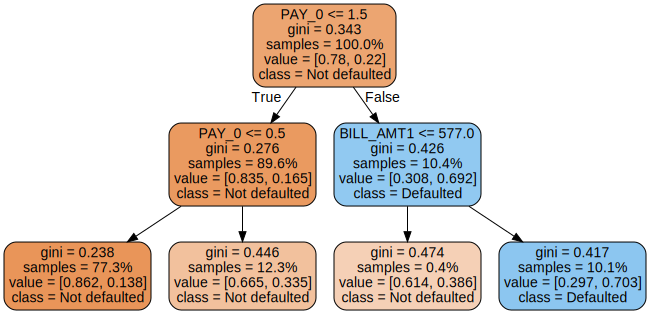

In [18]:
# 5. Hiển thị cây quyết định với package graphviz
dot_data = tree.export_graphviz(dt,
                out_file=None,
                filled=True,
                rounded=True,
                feature_names=features_response[:-1],
                proportion=True,
                class_names=['Not defaulted', 'Defaulted'])
graph = graphviz.Source(dot_data)
graph  # Hiển thị trong Jupyter

## Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau

In [ ]:
# 1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu
# (Giả sử đã chạy các bước trên)

In [19]:
# 2. Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}  # parameters
dt = tree.DecisionTreeClassifier()  # tree model
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1,
                  error_score=np.nan,  # Sửa: np.nan thay vì 'np.nan'
                  return_train_score=True)  # cv is the best model.
cv.fit(X_train, y_train)
print("Best params for DT:", cv.best_params_)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
Best params for DT: {'max_depth': 6}


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


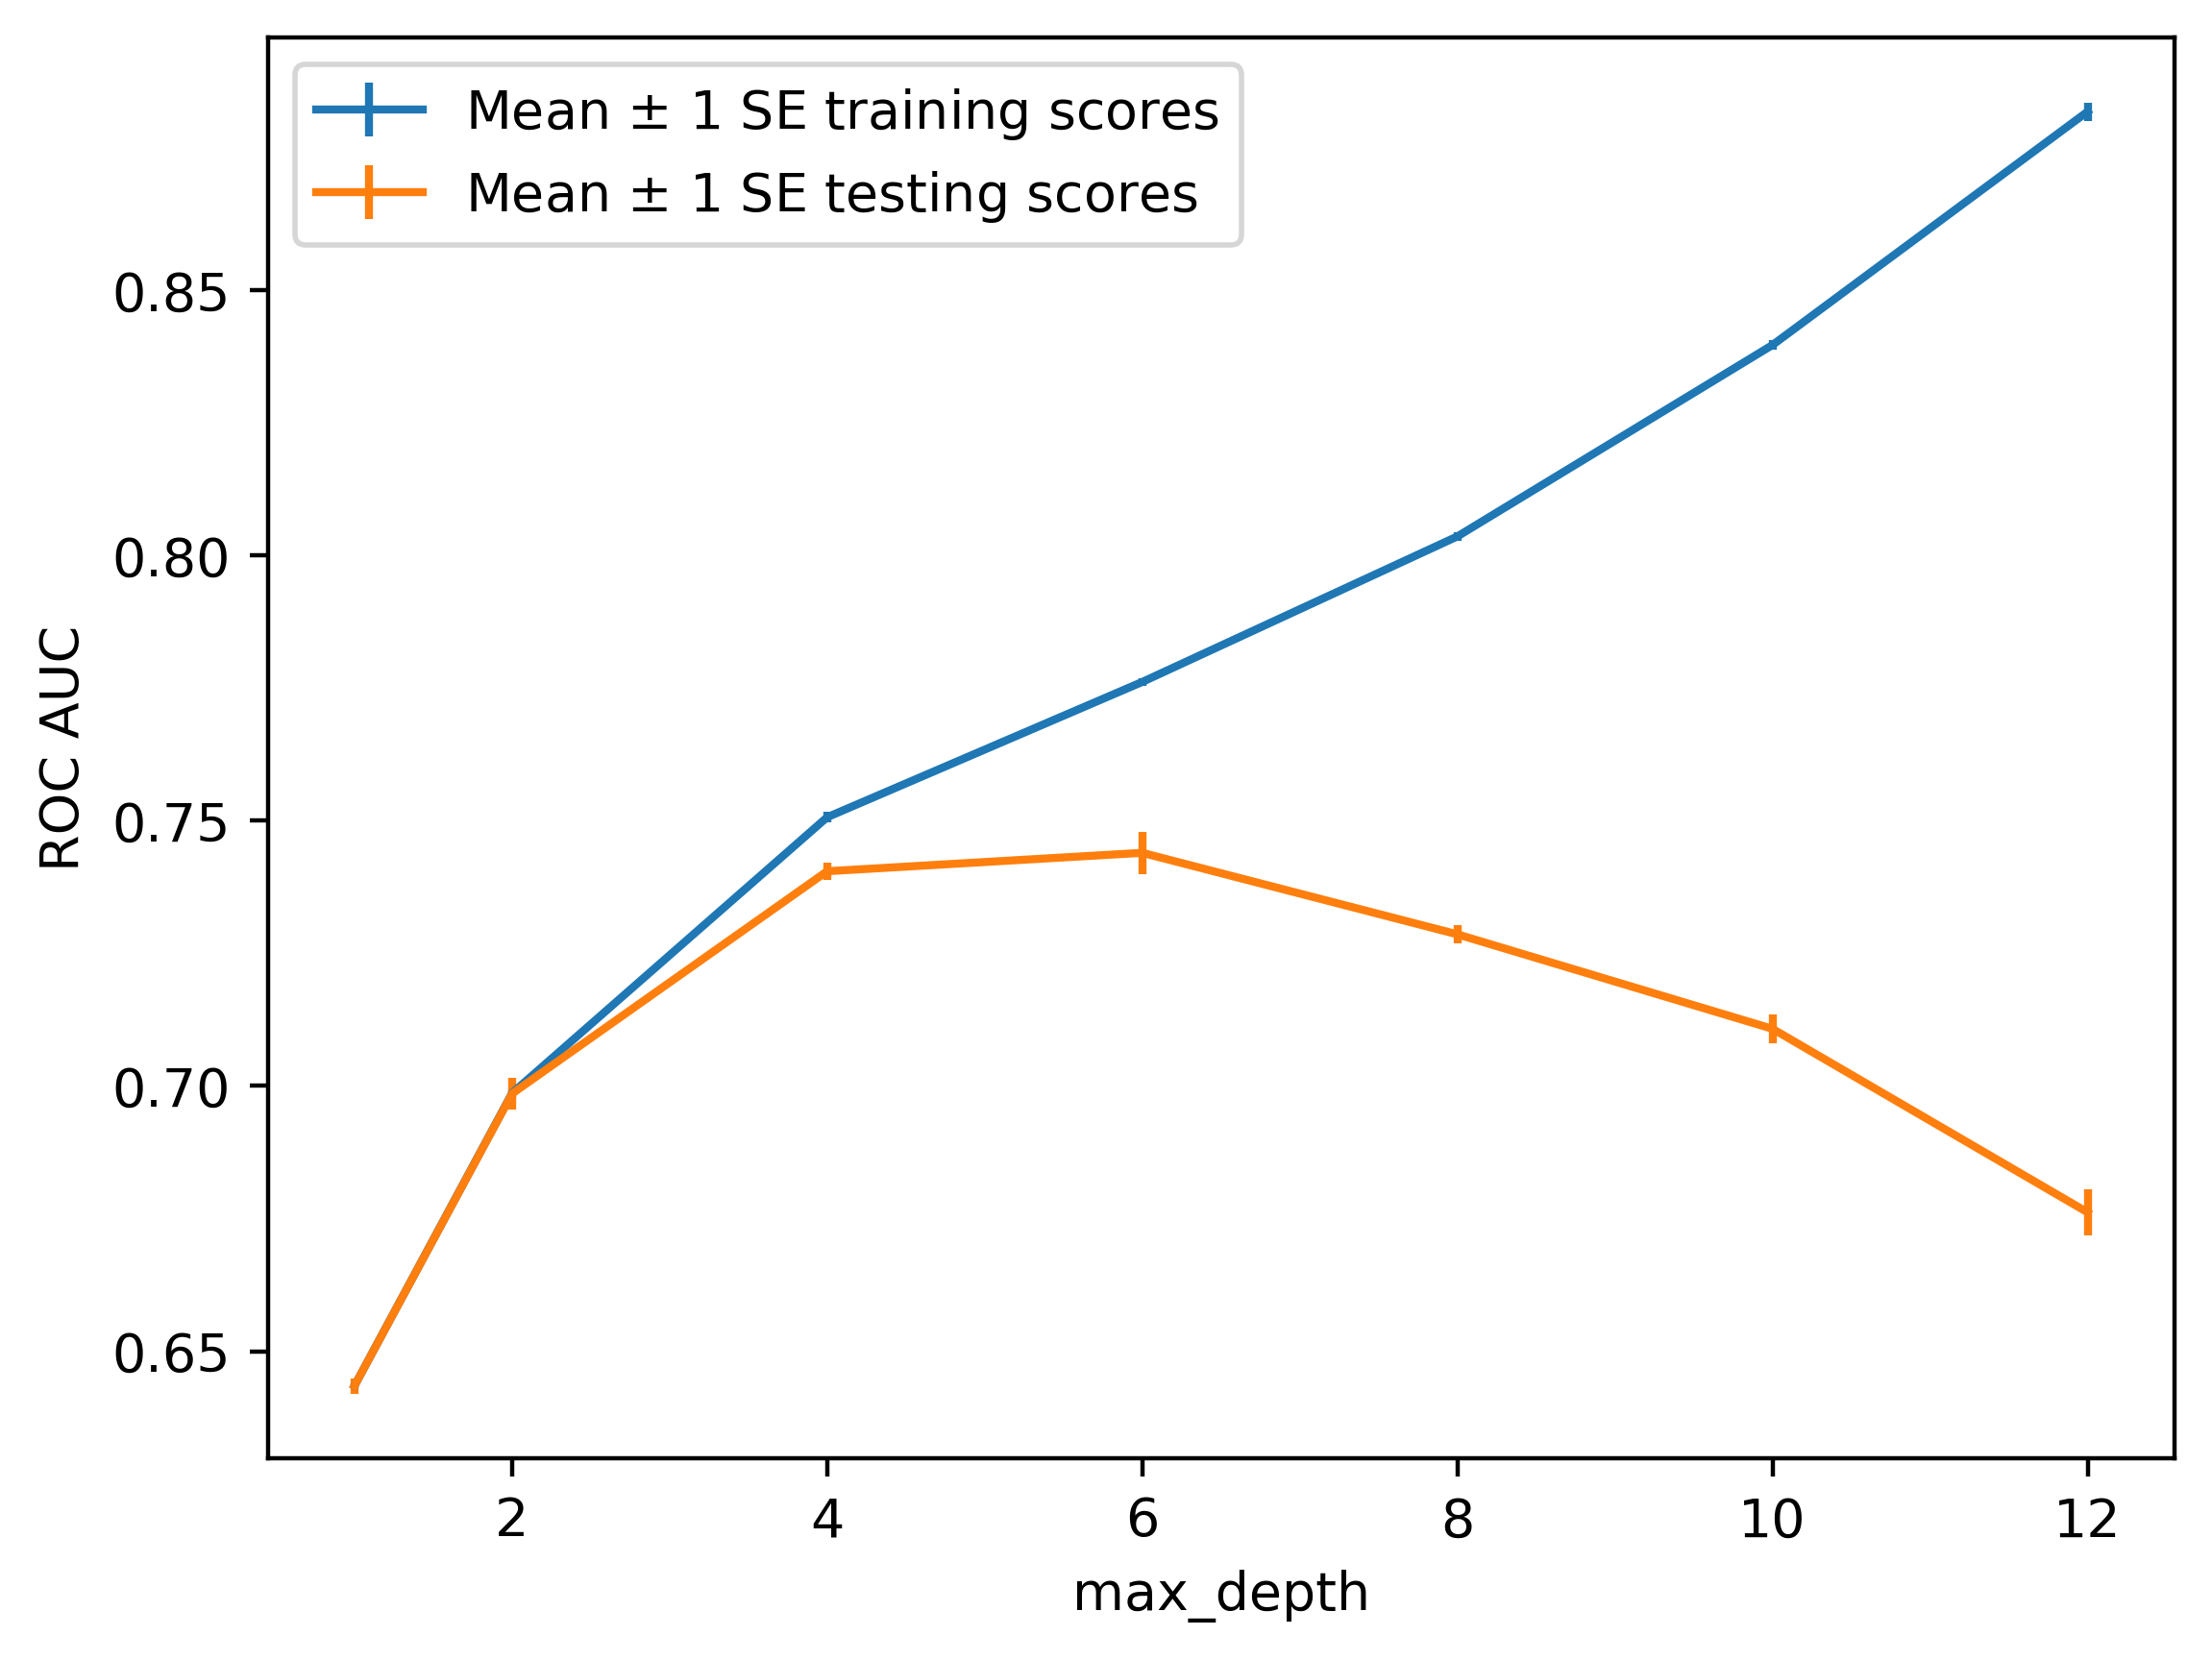

In [20]:
# 3. Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau
cv_results_df = pd.DataFrame(cv.cv_results_)
# View the names of the remaining columns in the results DataFrame
print(cv_results_df.columns)
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label=r'Mean $\pm$ 1 SE training scores')  # Sửa: raw string
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label=r'Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.show()

## Nhiệm vụ 3: Xây dựng rừng cây (Random Forest)

In [ ]:
# 1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu
# (Giả sử đã chạy các bước trên)

In [21]:
# 2. Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier\
  (n_estimators=10, criterion='gini', max_depth=3,
   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
   max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
   bootstrap=True, oob_score=False, n_jobs=None,
   random_state=4, verbose=0, warm_start=False, class_weight=None)
print("Random Forest initialized.")

Random Forest initialized.


In [22]:
# 3. Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó
# a parameter grid for this exercise in order to search the numbers of trees, ranging from 10 to 100 by 10s
rf_params_ex = {'n_estimators':list(range(10,110,10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
                        scoring='roc_auc', n_jobs=None,
                        refit=True, cv=4, verbose=1,
                        error_score=np.nan,  # Sửa: np.nan
                        return_train_score=True)
cv_rf_ex.fit(X_train, y_train)
print("Best params for RF:", cv_rf_ex.best_params_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best params for RF: {'n_estimators': 60}


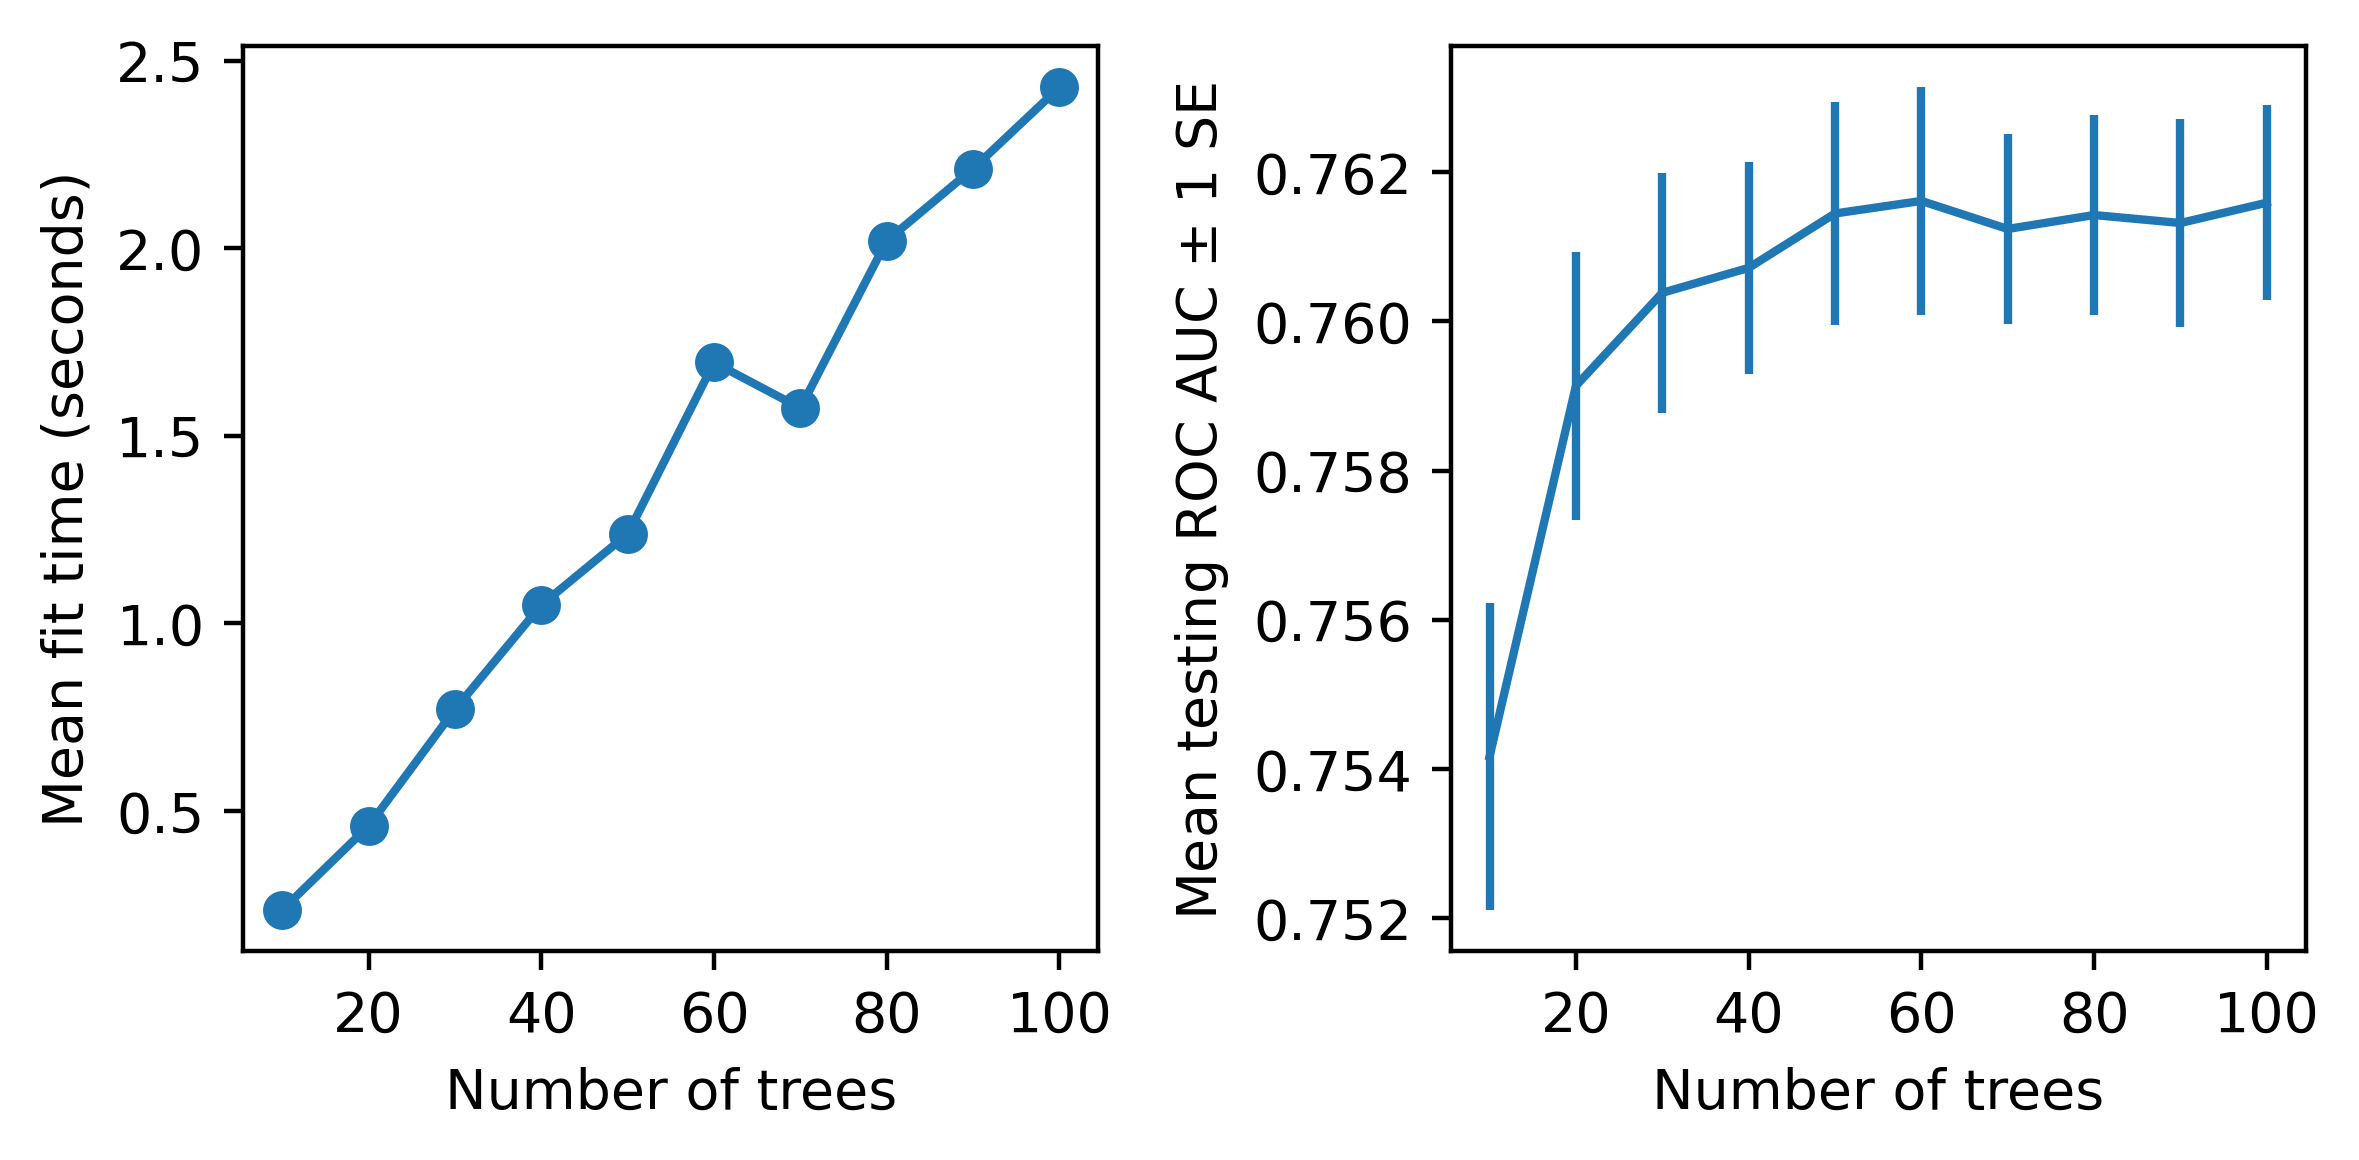

In [23]:
# 4. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel(r'Mean testing ROC AUC $\pm$ 1 SE ')  # Sửa: raw string
plt.tight_layout()
plt.show()

{'n_estimators': 60}


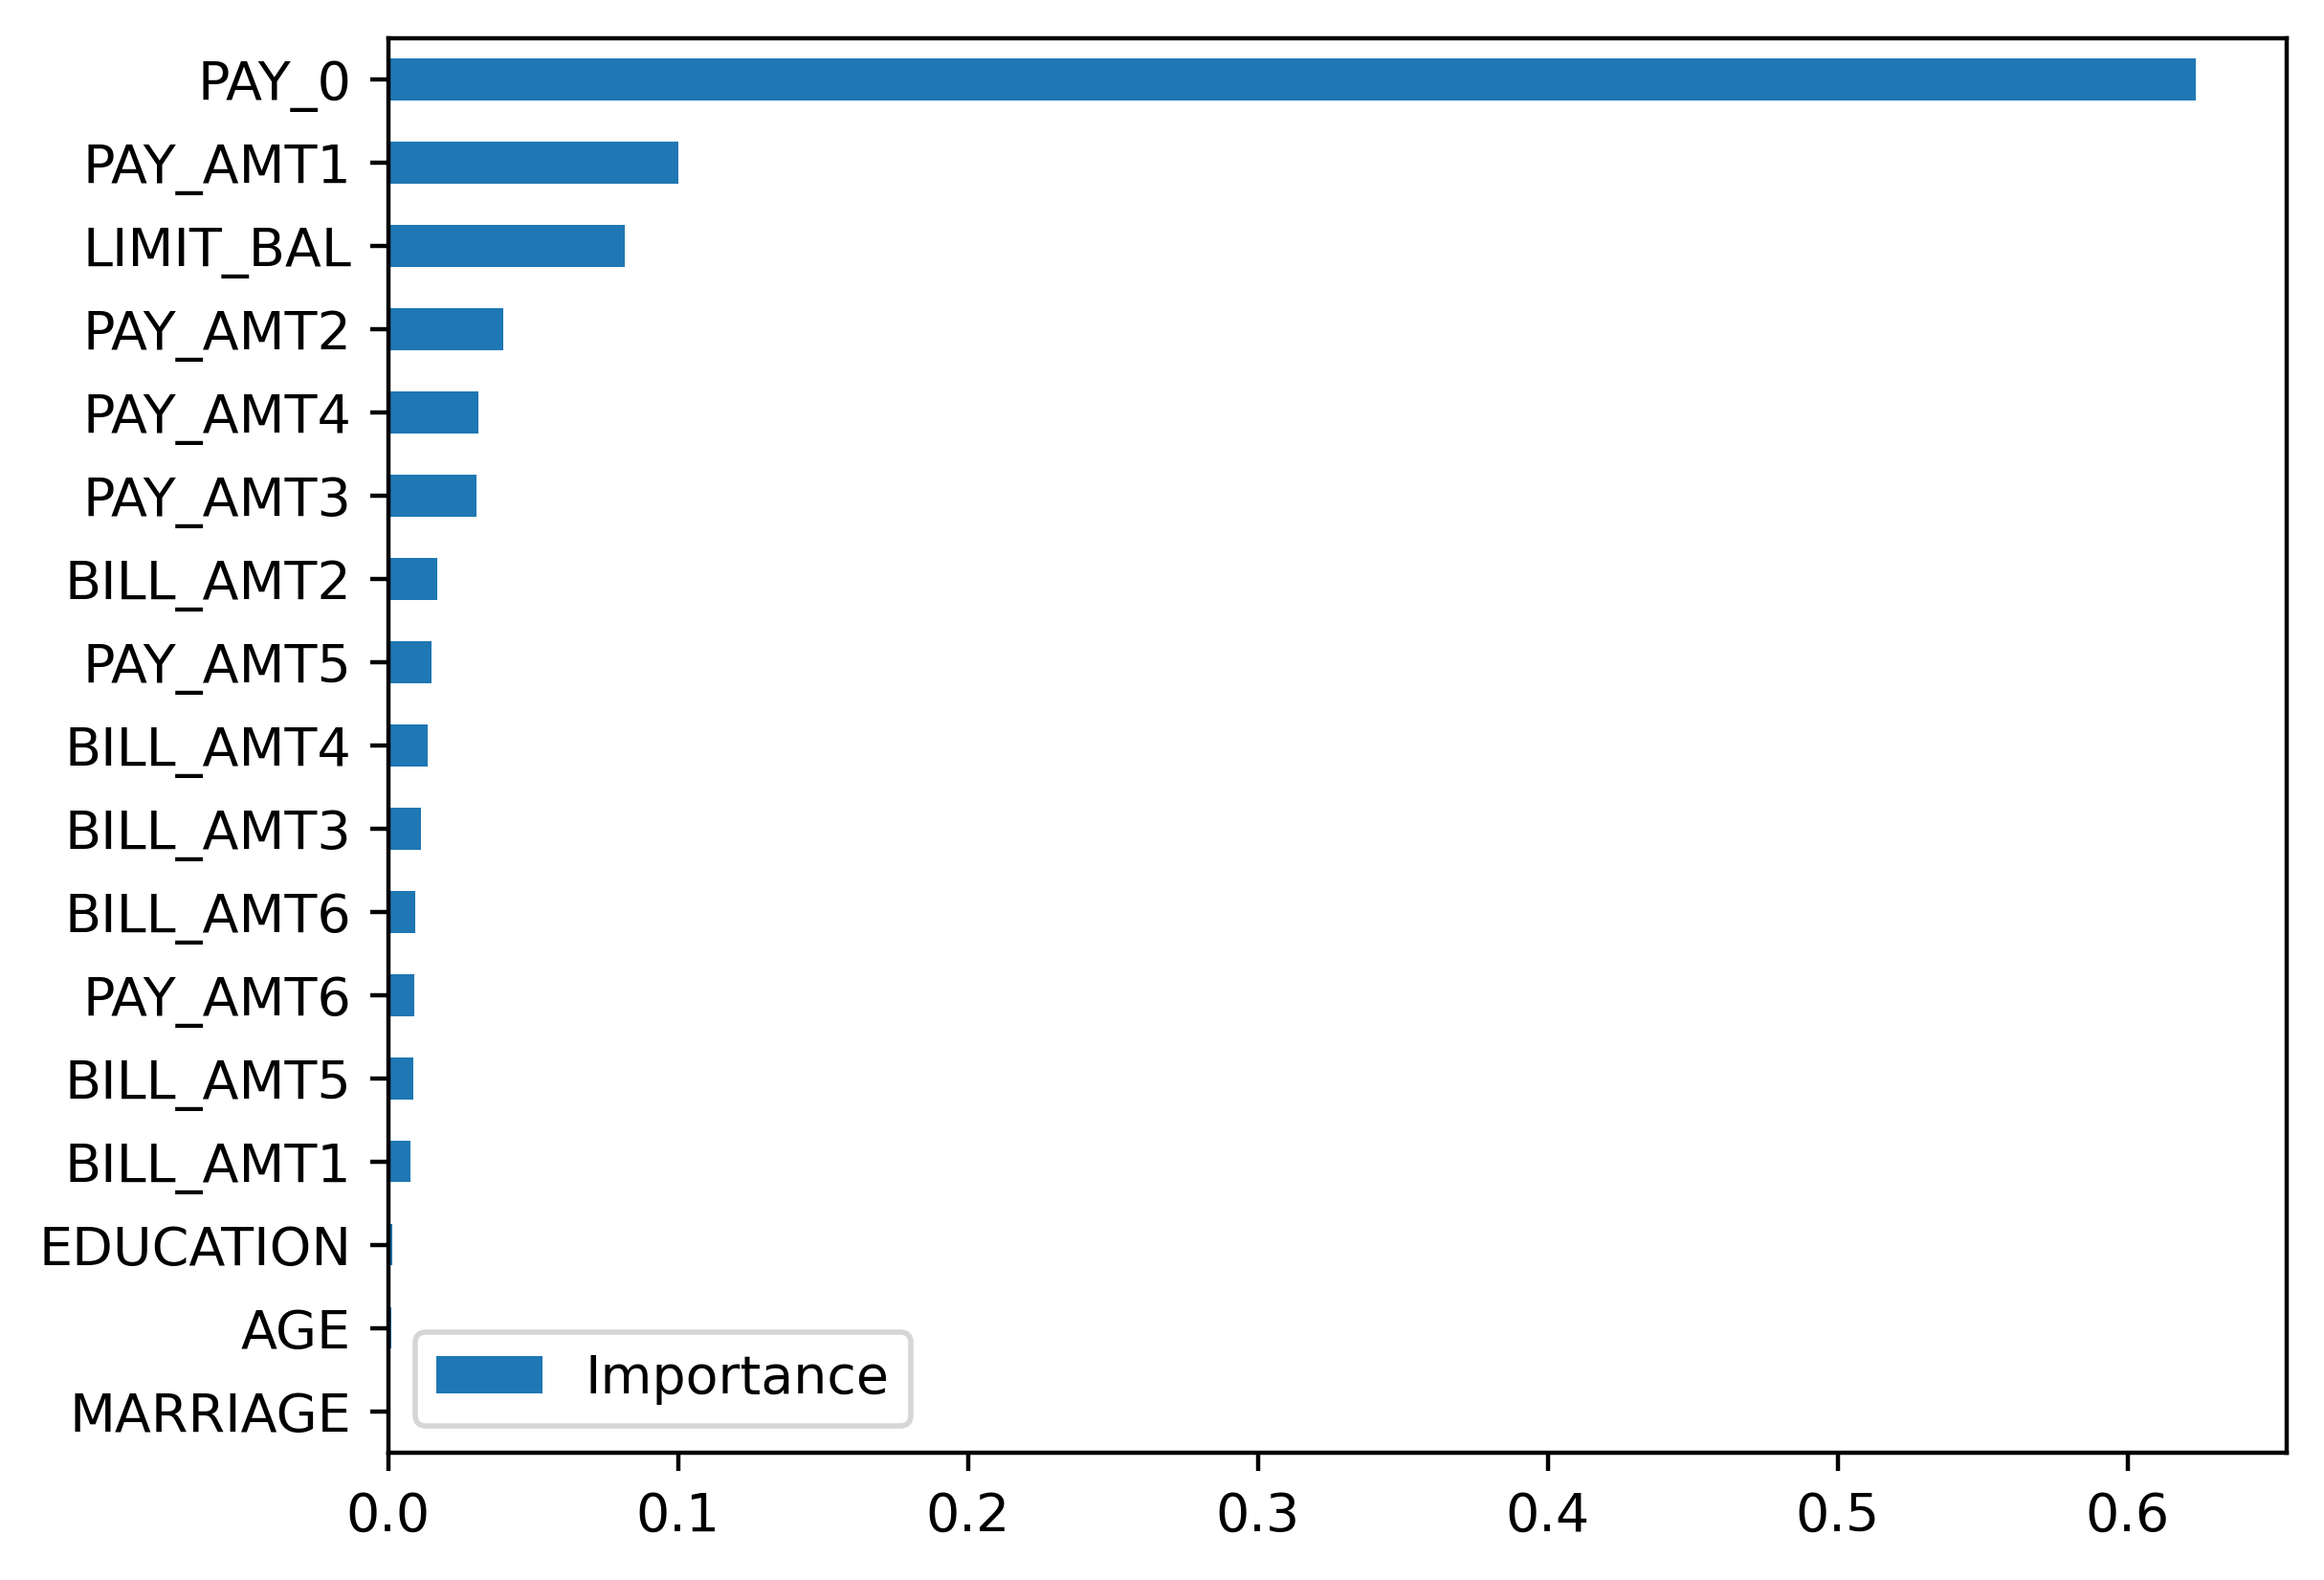

In [24]:
# 5. Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham số tốt nhất
# {'n_estimators': 50}
print(cv_rf_ex.best_params_)
# the feature names and importances
feat_imp_df = pd.DataFrame({
    'Importance':cv_rf_ex.best_estimator_.feature_importances_},
    index=features_response[:-1])
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()
plt.show()